In [1]:
import pandas as pd

In [2]:
wine_data = pd.read_csv('datasets/winequality-white.csv', names=['Fixes Acidity','Volatile Acidity','Citric Acid', 'Residual Sugar',
                                                                'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide', 'Density',
                                                                'ph', 'Sulphates', 'Alchol', 'Quality'],
                        skiprows=1,sep=r'\s*;\s*', engine='python'
                       )

wine_data.head()

,Fixes Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,ph,Sulphates,Alchol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine_data['Quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [4]:
x = wine_data.drop('Quality', axis=1)
y = wine_data['Quality']

from sklearn import preprocessing
x = preprocessing.scale(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [5]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty='l1', dual=False, tol = 1e-3)
clf_svc.fit(x_train, y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

In [6]:
accuracy = clf_svc.score(x_test, y_test)

print(accuracy)

0.49183673469387756


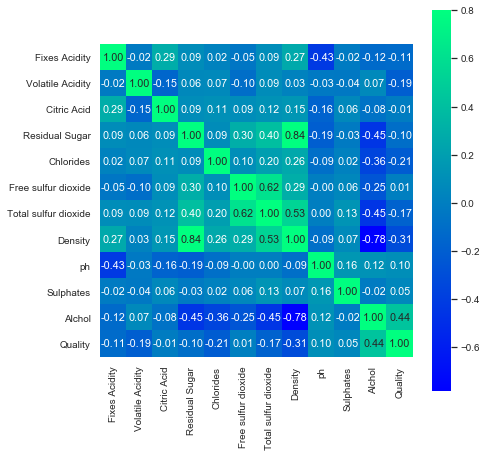

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.set(font_scale=0.9)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap="winter")

plt.show()

In [28]:
from sklearn.decomposition import PCA

pca=PCA(n_components=1, whiten=True)
x_reduced=pca.fit_transform(x)

In [29]:
pca.explained_variance_

array([3.2229119])

In [30]:
pca.explained_variance_ratio_

array([0.29293217])

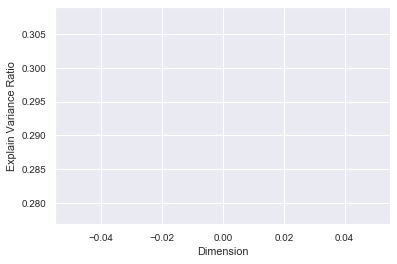

In [31]:
# this graph is called as the Scree plot - scree plots have an elbow

import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explain Variance Ratio')

plt.show()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_reduced,y,test_size=0.2, random_state=0)

clf_svc_pca = LinearSVC(penalty='l1', dual=False, tol = 1e-3)
clf_svc_pca.fit(x_train, y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

In [33]:
accuracy = clf_svc_pca.score(x_test, y_test)
print(accuracy)

0.44081632653061226


now chance the n_ componentes from 11 to 9 to 6